### CS-430 Homework 2, Anas Puthawala, Yeshwant Vemula, Luna Leing

In [1]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

import random
from random import randint
from datetime import datetime
import timeit
import math

In [2]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        #print(f'p: {p}     r: {r}     A: {A}') # un-comment this line if you want to see pivots and array after each iteration
        quicksort(A, p, q-1)
        quicksort(A, q+1, r)

In [3]:
def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r): #python implementation
        if A[j] <= x:
            i+=1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]

    out = i+1
    return out

In [53]:
print('Quicksort implementation:')
A = [24, 97, 40, 67, 88, 85, 15, 66, 53, 44, 26, 48, 16, 52, 45, 23, 90, 18, 49, 80]
print(f'Array before Quicksort: {A}')
quicksort(A, p=0, r=len(A)-1)
print(f'Array after Quicksort:{A}')

Quicksort implementation:
Array before Quicksort: [24, 97, 40, 67, 88, 85, 15, 66, 53, 44, 26, 48, 16, 52, 45, 23, 90, 18, 49, 80]
Array after Quicksort:[15, 16, 18, 23, 24, 26, 40, 44, 45, 48, 49, 52, 53, 66, 67, 80, 85, 88, 90, 97]


In [116]:
# Need to be able to collect data 

def collect_data(func1, func2, x):
    
    ns = []
    ts = []
    
    ns2 = []
    ts2 = []
    for i in range(1, x+1):
        ns.append(i)
        ns2.append(i)
        
        # Make a new array of random ints (0-500) of increasing size for which to run the function on (QS or optim. QS)
        lst = [random.randint(0,500) for l in range(i)]
        
        #Collecting time data
        start_time = timeit.default_timer() #Collecting time data for function 1
        func1(lst, p=0, r=len(lst)-1)
        end_time = timeit.default_timer()
        ts.append(end_time-start_time)
        
        st2 = timeit.default_timer() #Code for collecting time for function 2
        func2(lst, p=0, r=len(lst)-1)
        endt2 = timeit.default_timer()
        ts2.append(endt2-st2)
        
    # visualize results
    plt.figure(figsize=(10,5))
    plt.plot(ns, ts, 'or') #plotting time complexities for function1 (it will be the red dots)
    plt.plot(ns2, ts2, 'ob') #plotting time complexities for function2 (it will be the blue dots)
    plt.xlabel('Length of A')
    plt.ylabel('Time')
    plt.legend(['Optimized Quicksort', 'Quicksort'])
    plt.show()
    


Methodology of collecting and analyzing data:

(Note I use only 'ns' and 'ts' here but in reality there are two more, 'ns2' and 'ts2' and these are used to plot the data and compare the time complexities between the algorithim, see code above)

1. Make new array of random ints (0-500) of increasing size for which to run the function'func' on (Quicksort or Optimized quicksort)

2. Collect time data using the timeit python module in variable 'ts' while simultaneously appending the length of the current array to 'ns'

3. Output a plot of 'ns' and 'ts'

So as the array grows, 'ns' will grow and 'ts' should grow according to the algorithim used to sort it.

Optimization

We can use insertion sort to improve the running time of quicksort by applying tail-recursion. Insertion sort is faster when the input is nearly sorted, so if we call quicksort on a subarray with fewer than 'k' elements we can simply let it return without sorting the subarray and then run insertion sort on the array to finish the sorting process. 

K in this case was chosen manually to be 10 and we can see from the empirical proof in the plots below that it was a good choice.

In [120]:
def insertion_sort_2(arr, p, n):
    for i in range(p + 1, n + 1):
        val = arr[i]
        j = i
        while j>p and arr[j-1]>val:
            arr[j]= arr[j-1]
            j-= 1
        arr[j]= val
        
    return arr

def optimized_quicksort(A, p, r):
    while p<r:
        if r-p + 1 < 10:
            insertion_sort_2(A, p, r) #Insertion sort call for tail-recursion, k=10 in this case
            break
 
        else:
            pivot = partition(A, p, r)
            if pivot-p<r-pivot:
                optimized_quicksort(A, p, pivot-1)
                p = pivot + 1
            else:
                optimized_quicksort(A, pivot + 1, r)
                r = pivot-1
                
 #Partioning scheme remains the same in this one (see code above for partition scheme)

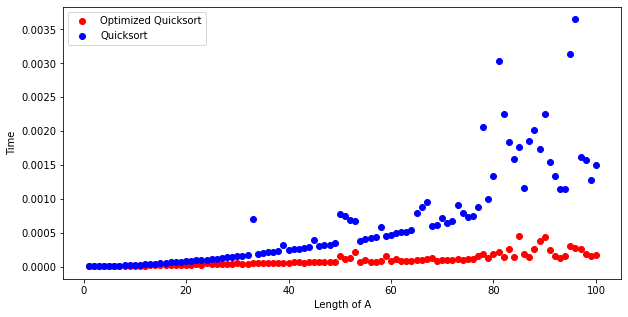

In [117]:
collect_data(func1=optimized_quicksort, func2=quicksort, x=100)

And we can run it with x = 1000 to see a clearer picture:

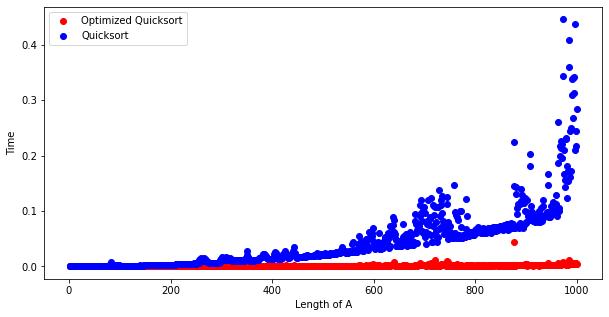

In [119]:
collect_data(func1=quicksort, func2=optimized_quicksort, x=1000)